<a href="https://colab.research.google.com/github/adrianyang2012/Bluefins_Analysis/blob/main/Bluefins_anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading in the data

In [ ]:
import csv
with open("newarkbluefins_athlete_report_card_240615150658.csv","r") as file:
  all_data = list(csv.DictReader(file))


In [ ]:
print(len(all_data))

752


Changing data to new format

In [ ]:
new_data = {}
current_person = all_data[0]['LastName_FirstName']
data_so_far = {'AgeGroup':all_data[0]['AgeGroup'],'AmountImprovedSec':all_data[0]['AmountImprovedSec'],'Strokes':{}}
for i in range(0,len(all_data)):
  if all_data[i]['LastName_FirstName'] != current_person:
    new_data[current_person] = data_so_far
    current_person = all_data[i]['LastName_FirstName']
    data_so_far = {'AgeGroup':all_data[i]['AgeGroup'],'Strokes':{}}


  data_so_far['Strokes'][all_data[i]['EventStroke']] = [all_data[i][f'Meet{x+1}-ResultSec'] for x in range(0,8)]

In [ ]:
#new_data

Visualizing what groups have how much swimmers

In [ ]:
groups = {}
for person in new_data.keys():
  try:
    groups[new_data[person]['AgeGroup']] +=1
  except:
    groups[new_data[person]['AgeGroup']] = 1

In [ ]:
#print(groups)
#print(len(new_data.keys()))

Pie chart for all groups

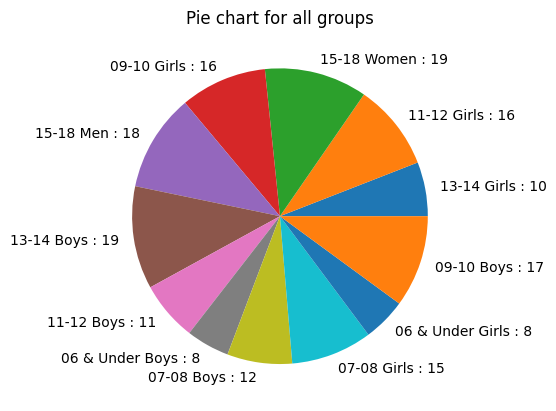

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
labels = [str(list(groups.keys())[x]) +' : ' + str(list(groups.values())[x]) for x in range(0,len(list(groups.keys())))]
vals = list(groups.values())
#print(vals,labels)
plt.pie(vals, labels= labels)
plt.title('Pie chart for all groups')
plt.show()

**Pie chart for girls and boys**

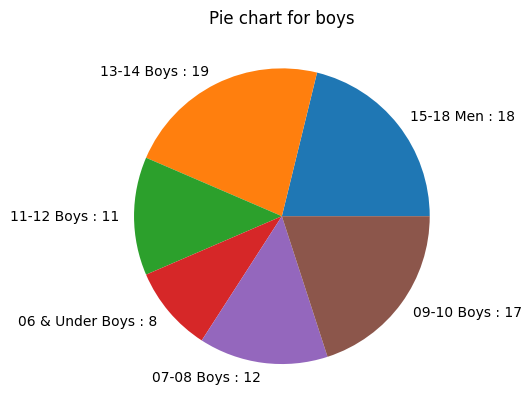

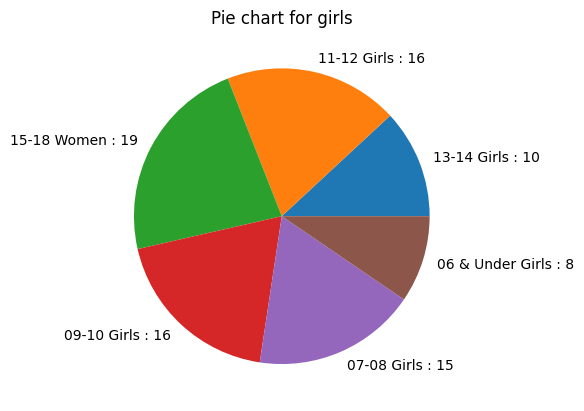

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
boy_labels = [str(list(groups.keys())[x]) +' : ' + str(list(groups.values())[x]) for x in range(0,len(list(groups.keys()))) if 'Boys' in str(list(groups.keys())[x]) or 'Men' in str(list(groups.keys())[x])]
boy_vals = [list(groups.values())[x] for x in range(0,len(list(groups.keys()))) if 'Boys' in str(list(groups.keys())[x]) or 'Men' in str(list(groups.keys())[x])]
#print(boy_vals,labels)
plt.pie(boy_vals, labels= boy_labels)
plt.title('Pie chart for boys')
plt.show()
girl_labels = [str(list(groups.keys())[x]) +' : ' + str(list(groups.values())[x]) for x in range(0,len(list(groups.keys()))) if 'Girls' in str(list(groups.keys())[x]) or 'Women' in str(list(groups.keys())[x])]
girl_vals = [list(groups.values())[x] for x in range(0,len(list(groups.keys()))) if 'Girls' in str(list(groups.keys())[x]) or 'Women' in str(list(groups.keys())[x])]
#print(vals,labels)
print('  ')
plt.pie(girl_vals, labels= girl_labels)
plt.title('Pie chart for girls')

plt.show()

Seeing how much girls and boys each

In [ ]:
boys = 0
girls = 0
for i in range(0,len(list(new_data.values()))):
  if 'Boys' in list(new_data.values())[i]['AgeGroup'] or 'Men' in list(new_data.values())[i]['AgeGroup']:
    boys+=1
  else:
    girls+=1
print(boys, girls)

85 84


In [ ]:
age_groups = {'06 & Under Girls':[],'06 & Under Boys':[],'07-08 Girls':[],'07-08 Boys':[],'09-10 Boys':[],'09-10 Girls':[],'11-12 Boys':[],'11-12 Girls':[],'13-14 Boys':[],'13-14 Girls':[],'15-18 Men':[],'15-18 Women':[]}
for name in new_data.keys():
  age_groups[new_data[name]['AgeGroup']].append(name)

In [ ]:
age_groups

{'06 & Under Girls': ['Colitz, Ada',
  'Feng, Elaine',
  'Huang, Abigail',
  'Huynh, Kayla',
  'Jin, Charlene',
  'Li, Grace',
  'Pathak, Aranya',
  'Van Cleave, Aeris'],
 '06 & Under Boys': ['Chen, Isaac',
  'Gerardo, Logan',
  'Karnik, Kiaan',
  'Li, Lucas',
  'Teh, Lee Hong',
  'WU, Alex',
  'Yip, Max',
  'Zhou, Yawen'],
 '07-08 Girls': ['Chong, Sandra',
  'Huang, Avery',
  'Lai, Piper',
  'Lee, Zoe',
  'Li, Abbie',
  'Low, Chloe',
  'Mott, Eloise',
  'Pantoja, Aurora',
  'Santiago, Annie',
  'Shi, Caroline',
  'Sychr, Mia',
  'WU, Amanda',
  'Xie, Emily',
  'Ye, Evelyn',
  'Zaballero, Ems'],
 '07-08 Boys': ['Chen, Jonathan',
  'Cheung, Elliot',
  'Frawley, Matthew',
  'Lin, Nicholas',
  'Liu, Muyao',
  'Manoj, Riaan',
  'Min, Nathaniel',
  'Shah, Rivaansh',
  'Wu, Ian',
  'Ye, Caden',
  'Zhang, Miles',
  'Zhou, Yixin'],
 '09-10 Boys': ['Colitz, Ezra',
  'Frawley, Joseph',
  'Huang, Aaron',
  'Huynh, Tommy',
  'Lai, Aiden',
  'Li/Warthen, Liam',
  'Lo, Otto',
  'Maulding, Nathaniel'

In [ ]:
import io
import pandas as pd
stuff =pd.read_csv(io.StringIO('''
2023 EBSL 6U,Girls,Boys
Free-Top 10,28.03,29.34
Free-Top 30,41.28,57.23
BK-Top 10,32.38,24.75
BK-Top 30,53.5,31.74
2023 EBSL 7-8,Girls,Boys
Free-Top 10,19.63,19.11
Free-Top 30,22.49,24.01
BK-Top 10,24.46,24.75
BK-Top 30,28.37,31.74
BR-Top 10,27.66,27.54
BR-Top 30,39.83,46.02
Fly-Top 10,23.51,26.27
Fly-Top 30,32.2,48.21
2023 EBSL 9-10,Girls,Boys
Free-Top 10,15.93,15.66
Free-Top 30,17.49,17.76
BK-Top 10,19.54,20.48
BK-Top 30,22.96,25.08
BR-Top 10,21.94,22.5
BR-Top 30,25.9,26.9
Fly-Top 10,18.08,18.32
Fly-Top 30,22.16,23.4
2023 EBSL 11-12,Girls,Boys
Free-Top 10,31.9,30.63
Free-Top 30,35.62,34.35
BK-Top 10,38.09,38.46
BK-Top 30,44.75,45.02
BR-Top 10,43.34,42.42
BR-Top 30,51.09,58.75
Fly-Top 10,35.98,34.82
Fly-Top 30,43.43,42.31
IM-Top 10,80.17,80.34
IM-Top 30,93.73,106.5
2023 EBSL 13-14,Girls,Boys
Free-Top 10,30.54,26.8
Free-Top 30,33.31,31.43
BK-Top 10,37.93,33.33
BK-Top 30,43.13,39.42
BR-Top 10,38.28,36.17
BR-Top 30,45.12,43.07
Fly-Top 10,33.89,31.12
Fly-Top 30,40.33,40
IM-Top 10,76.37,69.77
IM-Top 30,88.31,77.11
2023 EBSL 15-18,Women,Men
Free-Top 10,27.48,23.4
Free-Top 30,29.87,25.84
BK-Top 10,33.24,28.11
BK-Top 30,36.93,36.16
BR-Top 10,37.2,31.42
BR-Top 30,41.49,34.68
Fly-Top 10,30.91,25.43
Fly-Top 30,34.47,28.65
IM-Top 10,69.01,60.97
IM-Top 30,76.84,68.05
'''), header=None)
rows = list(stuff[0])
times = {}
for i in range(0,len(rows)):
  if 'EBSL' in rows[i]:
    current_group = rows[i]
    times[current_group] = {}
  else:
    times[current_group][rows[i]] = [stuff[1][i],stuff[2][i]]
times

{'2023 EBSL 6U': {'Free-Top 10': ['28.03', '29.34'],
  'Free-Top 30': ['41.28', '57.23'],
  'BK-Top 10': ['32.38', '24.75'],
  'BK-Top 30': ['53.5', '31.74']},
 '2023 EBSL 7-8': {'Free-Top 10': ['19.63', '19.11'],
  'Free-Top 30': ['22.49', '24.01'],
  'BK-Top 10': ['24.46', '24.75'],
  'BK-Top 30': ['28.37', '31.74'],
  'BR-Top 10': ['27.66', '27.54'],
  'BR-Top 30': ['39.83', '46.02'],
  'Fly-Top 10': ['23.51', '26.27'],
  'Fly-Top 30': ['32.2', '48.21']},
 '2023 EBSL 9-10': {'Free-Top 10': ['15.93', '15.66'],
  'Free-Top 30': ['17.49', '17.76'],
  'BK-Top 10': ['19.54', '20.48'],
  'BK-Top 30': ['22.96', '25.08'],
  'BR-Top 10': ['21.94', '22.5'],
  'BR-Top 30': ['25.9', '26.9'],
  'Fly-Top 10': ['18.08', '18.32'],
  'Fly-Top 30': ['22.16', '23.4']},
 '2023 EBSL 11-12': {'Free-Top 10': ['31.9', '30.63'],
  'Free-Top 30': ['35.62', '34.35'],
  'BK-Top 10': ['38.09', '38.46'],
  'BK-Top 30': ['44.75', '45.02'],
  'BR-Top 10': ['43.34', '42.42'],
  'BR-Top 30': ['51.09', '58.75'],
  'F

In [ ]:
new_times = {}
for group in times:
  boys = {}
  girls = {}
  for stroke in times[group]:
    boys[stroke.replace('Free','Freestyle').replace('BK','Backstroke').replace('BR','Breaststroke').replace('Fly','Butterfly')] = times[group][stroke][1]
    girls[stroke.replace('Free','Freestyle').replace('BK','Backstroke').replace('BR','Breaststroke').replace('Fly','Butterfly')] = times[group][stroke][0]
  the_group = group.replace('2023 EBSL ','').replace('6U','06 & Under').replace('7-8','07-08').replace('9-10','09-10')
  if '15' in the_group:
    new_times[the_group + ' Men'] = boys
    new_times[the_group + ' Women'] = girls
  else:
    new_times[the_group + ' Boys'] = boys
    new_times[the_group + ' Girls'] = girls
new_times

{'06 & Under Boys': {'Freestyle-Top 10': '29.34',
  'Freestyle-Top 30': '57.23',
  'Backstroke-Top 10': '24.75',
  'Backstroke-Top 30': '31.74'},
 '06 & Under Girls': {'Freestyle-Top 10': '28.03',
  'Freestyle-Top 30': '41.28',
  'Backstroke-Top 10': '32.38',
  'Backstroke-Top 30': '53.5'},
 '07-08 Boys': {'Freestyle-Top 10': '19.11',
  'Freestyle-Top 30': '24.01',
  'Backstroke-Top 10': '24.75',
  'Backstroke-Top 30': '31.74',
  'Breaststroke-Top 10': '27.54',
  'Breaststroke-Top 30': '46.02',
  'Butterfly-Top 10': '26.27',
  'Butterfly-Top 30': '48.21'},
 '07-08 Girls': {'Freestyle-Top 10': '19.63',
  'Freestyle-Top 30': '22.49',
  'Backstroke-Top 10': '24.46',
  'Backstroke-Top 30': '28.37',
  'Breaststroke-Top 10': '27.66',
  'Breaststroke-Top 30': '39.83',
  'Butterfly-Top 10': '23.51',
  'Butterfly-Top 30': '32.2'},
 '09-10 Boys': {'Freestyle-Top 10': '15.66',
  'Freestyle-Top 30': '17.76',
  'Backstroke-Top 10': '20.48',
  'Backstroke-Top 30': '25.08',
  'Breaststroke-Top 10': '

In [ ]:
new_times['09-10 Boys']['Breaststroke-Top 10']

'22.5'

In [ ]:
GLOBAL_MODE = 0

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print('* stands for fastest time in the group')
df_all_data = []

for group in age_groups.keys():
  df = pd.DataFrame({'Name':[],'Freestyle':[],'Backstroke':[],'Breaststroke':[],'Butterfly':[],'IM':[]})
  df_data = pd.DataFrame({'Name':[],'Freestyle':[],'Backstroke':[],'Breaststroke':[],'Butterfly':[],'IM':[]})
  fastest_free = float('inf')
  fastest_free_person = 'Nobody'
  fastest_back = float('inf')
  fastest_back_person = 'Nobody'
  fastest_breast = float('inf')
  fastest_breast_person = 'Nobody'
  fastest_fly = float('inf')
  fastest_fly_person = 'Nobody'
  fastest_IM = float('inf')
  fastest_IM_person = 'Nobody'
  for name in age_groups[group]:
    my_dict = {'Name':name}
    if 'Free' in dict(new_data[name])['Strokes'].keys():
      my_dict['Freestyle'] = str(min([float(x) if x != '' else float('inf') for x in dict(new_data[name])['Strokes']['Free']]))
      if float(my_dict['Freestyle']) < fastest_free:
        fastest_free = float(my_dict['Freestyle'])
        fastest_free_person = name
    if 'Back' in dict(new_data[name])['Strokes'].keys():
      my_dict['Backstroke'] = str(min([float(x) if x != '' else float('inf') for x in dict(new_data[name])['Strokes']['Back']]))
      if float(my_dict['Backstroke']) < fastest_back:
        fastest_back = float(my_dict['Backstroke'])
        fastest_back_person = name
    if 'Breast' in dict(new_data[name])['Strokes'].keys():
      my_dict['Breaststroke'] = str(min([float(x) if x != '' else float('inf') for x in dict(new_data[name])['Strokes']['Breast']]))
      if float(my_dict['Breaststroke']) < fastest_breast:
        fastest_breast = float(my_dict['Breaststroke'])
        fastest_breast_person = name
    if 'Fly' in dict(new_data[name])['Strokes'].keys():
      my_dict['Butterfly'] = str(min([float(x) if x != '' else float('inf') for x in dict(new_data[name])['Strokes']['Fly']]))
      if float(my_dict['Butterfly']) < fastest_fly:
        fastest_fly = float(my_dict['Butterfly'])
        fastest_fly_person = name
    if 'IM' in dict(new_data[name])['Strokes'].keys():

      my_dict['IM'] = str(min([float(x) if x != '' else float('inf') for x in dict(new_data[name])['Strokes']['IM']]))
      if float(my_dict['IM']) < fastest_IM:
        fastest_IM = float(my_dict['IM'])
        fastest_IM_person = name
    df_data.loc[len(df)] = my_dict
    strokes_they_swam = list(my_dict.keys())
    strokes_they_swam.remove('Name')
    for stroke in strokes_they_swam:
      try:
        if float(my_dict[stroke]) < float(new_times[group][f'{stroke}-Top 30']):
          if float(my_dict[stroke]) < float(new_times[group][f'{stroke}-Top 10']):
            if GLOBAL_MODE:
              my_dict[stroke] = 'top 10'
            else:
              my_dict[stroke] = str(my_dict[stroke]) + '!'
          else:
            if GLOBAL_MODE:
              my_dict[stroke] = 'top 30'
            else:
              my_dict[stroke] = str(my_dict[stroke]) + '~'
        else:
          if GLOBAL_MODE:
            my_dict[stroke] = ' '
      except:
        try:
          if float(my_dict[stroke]) < float(new_times[group][f'{stroke}-Top 10']):
            if GLOBAL_MODE:
              my_dict[stroke] = 'top 10'
            else:
              my_dict[stroke] = str(my_dict[stroke]) + '!'
        except:
          if GLOBAL_MODE:
            my_dict[stroke] = 'top 10'
          else:
            my_dict[stroke] = str(my_dict[stroke]) + '!'
    df.loc[len(df)] = my_dict

  print()
  print(group)
  print()
  df['Freestyle'][[x[0] for x in df.values].index(fastest_free_person)] = df['Freestyle'][[x[0] for x in df.values].index(fastest_free_person)]+'*'
  df['Backstroke'][[x[0] for x in df.values].index(fastest_back_person)] = df['Backstroke'][[x[0] for x in df.values].index(fastest_back_person)]+'*'
  if not fastest_breast_person == 'Nobody':
    df['Breaststroke'][[x[0] for x in df.values].index(fastest_breast_person)] = df['Breaststroke'][[x[0] for x in df.values].index(fastest_breast_person)]+'*'
  if not fastest_fly_person == 'Nobody':
    df['Butterfly'][[x[0] for x in df.values].index(fastest_fly_person)] = df['Butterfly'][[x[0] for x in df.values].index(fastest_fly_person)]+'*'
  if not fastest_IM_person == 'Nobody':
    df['IM'][[x[0] for x in df.values].index(fastest_IM_person)] = df['IM'][[x[0] for x in df.values].index(fastest_IM_person)]+'*'

  #print('Fastest times')
  #print()
  #print('Free: '+fastest_free_person+' with '+str(fastest_free))
  #print('Back: '+fastest_back_person+' with '+str(fastest_back))
  #print('Breast: '+fastest_breast_person+' with '+str(fastest_breast))
  #print('Fly: '+fastest_fly_person+' with '+str(fastest_fly))
  #print('IM: '+fastest_IM_person+' with '+str(fastest_IM))
  print(df.to_markdown())
  df_all_data.append(df_data)

* stands for fastest time in the group

06 & Under Girls

|    | Name              | Freestyle   | Backstroke   | Breaststroke   | Butterfly   |   IM |
|---:|:------------------|:------------|:-------------|:---------------|:------------|-----:|
|  0 | Colitz, Ada       | 26.6!       | 31.14!       | 37.78!*        | nan         |  nan |
|  1 | Feng, Elaine      | 27.13!      | 40.9~        | 45.89!         | 51.73!      |  nan |
|  2 | Huang, Abigail    | 28.82~      | 34.04~       | 48.04!         | nan         |  nan |
|  3 | Huynh, Kayla      | 27.35!      | 33.64~       | nan            | nan         |  nan |
|  4 | Jin, Charlene     | 26.48!*     | 30.96!*      | 43.87!         | nan         |  nan |
|  5 | Li, Grace         | 31.13~      | 32.51~       | 53.43!         | 45.78!*     |  nan |
|  6 | Pathak, Aranya    | 34.86~      | 32.85~       | 43.26!         | nan         |  nan |
|  7 | Van Cleave, Aeris | 40.4~       | 44.74~       | nan            | nan         |  nan |

0

In [ ]:
point_earners = []
super_point_earners = []
for age_group_data in df_all_data:
  for i in range(0,len(age_group_data['Name'])):
    strokes = ['Freestyle','Backstroke','Breaststroke','Butterfly','IM']
    strokes_format_2 = ['Free','BK','BR','Fly','IM']
    for stroke in strokes_format_2:
      try:
        age_group = '2023 EBSL '+ new_data[age_group_data['Name'][i]]['AgeGroup'].replace(' Women','').replace(' Men','').replace(' Boys','').replace(' Girls','').replace('06 & Under','6U').replace('07','7').replace('08','8').replace('09','9')
        if 'Boys' in new_data[age_group_data['Name'][i]]['AgeGroup'] or 'Men' in new_data[age_group_data['Name'][i]]['AgeGroup']:
          top_30 = times[age_group][f'{stroke}-Top 30'][0]
          top_10 = times[age_group][f'{stroke}-Top 10'][0]
        else:
          top_30 = times[age_group][f'{stroke}-Top 30'][1]
          top_10 = times[age_group][f'{stroke}-Top 10'][1]
        #print(float(age_group_data.loc[i]['Freestyle']))
        if float(top_30) > float(age_group_data.loc[i][strokes[strokes_format_2.index(stroke)]]):
          point_earners.append(age_group_data['Name'][i] + ' ' + strokes[strokes_format_2.index(stroke)])
          if float(top_10) > float(age_group_data.loc[i][strokes[strokes_format_2.index(stroke)]]):
            super_point_earners.append(age_group_data['Name'][i] + ' ' + strokes[strokes_format_2.index(stroke)])
      except KeyError as e:
        print(e)
        pass
print(len(point_earners))
print(len(super_point_earners))

'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'BR-Top 30'
'Fly-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'
'IM-Top 30'


In [ ]:
super_point_earners

['Colitz, Ada Freestyle',
 'Feng, Elaine Freestyle',
 'Huang, Abigail Freestyle',
 'Huynh, Kayla Freestyle',
 'Jin, Charlene Freestyle',
 'Li, Lucas Freestyle',
 'Li, Lucas Backstroke',
 'Yip, Max Freestyle',
 'Lee, Zoe Butterfly',
 'Santiago, Annie Freestyle',
 'Santiago, Annie Backstroke',
 'Santiago, Annie Breaststroke',
 'Santiago, Annie Butterfly',
 'Manoj, Riaan Freestyle',
 'Manoj, Riaan Breaststroke',
 'Manoj, Riaan Butterfly',
 'Shah, Rivaansh Freestyle',
 'Ye, Caden Freestyle',
 'Ye, Caden Backstroke',
 'Ye, Caden Breaststroke',
 'Lai, Aiden Freestyle',
 'Lai, Aiden Breaststroke',
 'Yu, Jonathan Freestyle',
 'Yu, Jonathan Breaststroke',
 'Yu, Jonathan Butterfly',
 'Zhang, Dylan Backstroke',
 'Zhang, Dylan Breaststroke',
 'Chen, Celina Backstroke',
 'Fernando, Kaui Breaststroke',
 'Huwe, Juliet Breaststroke',
 'Leyva, Alicea Freestyle',
 'Perlas, Adelyn Freestyle',
 'Perlas, Adelyn Backstroke',
 'Perlas, Adelyn Breaststroke',
 'Perlas, Adelyn Butterfly',
 'Sychr, Isa Breaststr

In [ ]:
top_30_once = []
top_30_twice = []
top_30_three_times = []
#four_times = 0
def find_how_many_got_contained(li,string):
  count = 0
  for i in range(0,len(li)):
    if string in li[i]:
      count+=1
  return count
for person in list(new_data.keys()):
  if find_how_many_got_contained(point_earners,person) > 0:
    top_30_once.append(person)
    if find_how_many_got_contained(point_earners,person) > 1:
      top_30_twice.append(person)
      if find_how_many_got_contained(point_earners,person) >2:
        top_30_three_times.append(person)

print(len(top_30_once), len(top_30_twice), len(top_30_three_times))

132 103 82


In [ ]:
top_30_three_times

['Bandyopadhyay, Shristi',
 'Cai, Evan',
 'Caminez, Jonathan',
 'Canen, Aiden',
 'Cao, Ethan',
 'Cao, Evan',
 'Chembu, Achyuth',
 'Chen, Celina',
 'Chen, Jonathan',
 'Cheung, Olive',
 'Coleman, Jarrett',
 "D'Amelio, Jimmy",
 'D’Amelio, Jimmy',
 'Dimick, Kaida',
 'Evans, Olivia',
 'Fernando, Kaui',
 'Fernando, Makai',
 'Haba, Ellie',
 'Haba, Evan',
 'Hin, Baylis',
 'Ho, Justin',
 'Ho, Patrick',
 'Huang, Avery',
 'Huwe, Juliet',
 'Jiang, Vivienne',
 'Karnik, Kaeya',
 'Kundrat, Adiana',
 'Kundrat, Carina',
 'Lai, Aiden',
 'Le, Nolan',
 'Lee, Michael',
 'Lee, Zoe',
 'Leyva, Alicea',
 'Leyva, Anabella',
 'Li, Abbie',
 'Li, Aiden',
 'Low, Chloe',
 'Lu, Aaron',
 'Manoj, Riaan',
 'Martinez, Amelia',
 'Martinez, Olivia',
 'McGrath, Tom',
 'McLoy, Miya',
 'Min, Nathaniel',
 'Mott, Eloise',
 'Nabar, Neel',
 'Nguyen, Minh-Anh',
 'Nguyen, Nathan',
 'Perlas, Adelyn',
 'Ponssen, Derek',
 'Rahimi, Barsam',
 'Rees, Quinn',
 'Santiago, Annie',
 'Saturnio, Isaiah',
 'Saturnio, Noah',
 'Shah, Rivaansh',
 

In [ ]:
top_10_once = []
top_10_twice = []
top_10_three_times = []
#four_times = 0
def find_how_many_got_contained(li,string):
  count = 0
  for i in range(0,len(li)):
    if string in li[i]:
      count+=1
  return count
for person in list(new_data.keys()):
  if find_how_many_got_contained(super_point_earners,person) > 0:
    top_10_once.append(person)
    if find_how_many_got_contained(super_point_earners,person) > 1:
      top_10_twice.append(person)
      if find_how_many_got_contained(super_point_earners,person) >2:
        top_10_three_times.append(person)

print(len(top_10_once), len(top_10_twice), len(top_10_three_times))

59 42 34


In [ ]:
top_10_each_group = {}
top_30_each_group = {}
for person in top_30_once:
  if new_data[person]['AgeGroup'] in top_30_each_group.keys():
    top_30_each_group[new_data[person]['AgeGroup']].append(person)
  else:
    top_30_each_group[new_data[person]['AgeGroup']] = [person]

In [ ]:
for person in top_10_once:
  if new_data[person]['AgeGroup'] in top_10_each_group.keys():
    top_10_each_group[new_data[person]['AgeGroup']].append(person)
  else:
    top_10_each_group[new_data[person]['AgeGroup']] = [person]

In [ ]:
top_10_each_group

{'15-18 Men': ['Cai, Evan',
  'Canen, Aiden',
  'Chembu, Achyuth',
  'Choy, Ethan',
  'Coleman, Jarrett',
  'Haba, Evan',
  'Hin, Baylis',
  'Ho, Justin',
  'Ho, Patrick',
  'Le, Nolan',
  'McGrath, Tom',
  'Ponssen, Derek',
  'Rees, Quinn',
  'Tan, Jonathan',
  'Tran, Benjamin',
  'Trujillo, Bernie',
  'Tse, Don'],
 '13-14 Boys': ['Caminez, Jonathan',
  'Cao, Evan',
  "D'Amelio, Jimmy",
  'D’Amelio, Jimmy',
  'Lee, Michael',
  'Li, Aiden',
  'Lu, Aaron',
  'Nguyen, Minh-Anh',
  'Nguyen, Nathan',
  'Saturnio, Noah',
  'Wang, Ronald',
  'Ye, Ethan',
  'Yu, James'],
 '09-10 Girls': ['Chen, Celina',
  'Fernando, Kaui',
  'Huwe, Juliet',
  'Leyva, Alicea',
  'Perlas, Adelyn',
  'Sychr, Isa',
  'Yang, Anita'],
 '06 & Under Girls': ['Colitz, Ada',
  'Feng, Elaine',
  'Huang, Abigail',
  'Huynh, Kayla',
  'Jin, Charlene'],
 '11-12 Girls': ['Dimick, Kaida', 'Karnik, Kaeya', 'McLoy, Miya'],
 '11-12 Boys': ['Fernando, Makai', 'Yang, Adrian', 'Yu, Ryan'],
 '13-14 Girls': ['Kundrat, Adiana'],
 '09

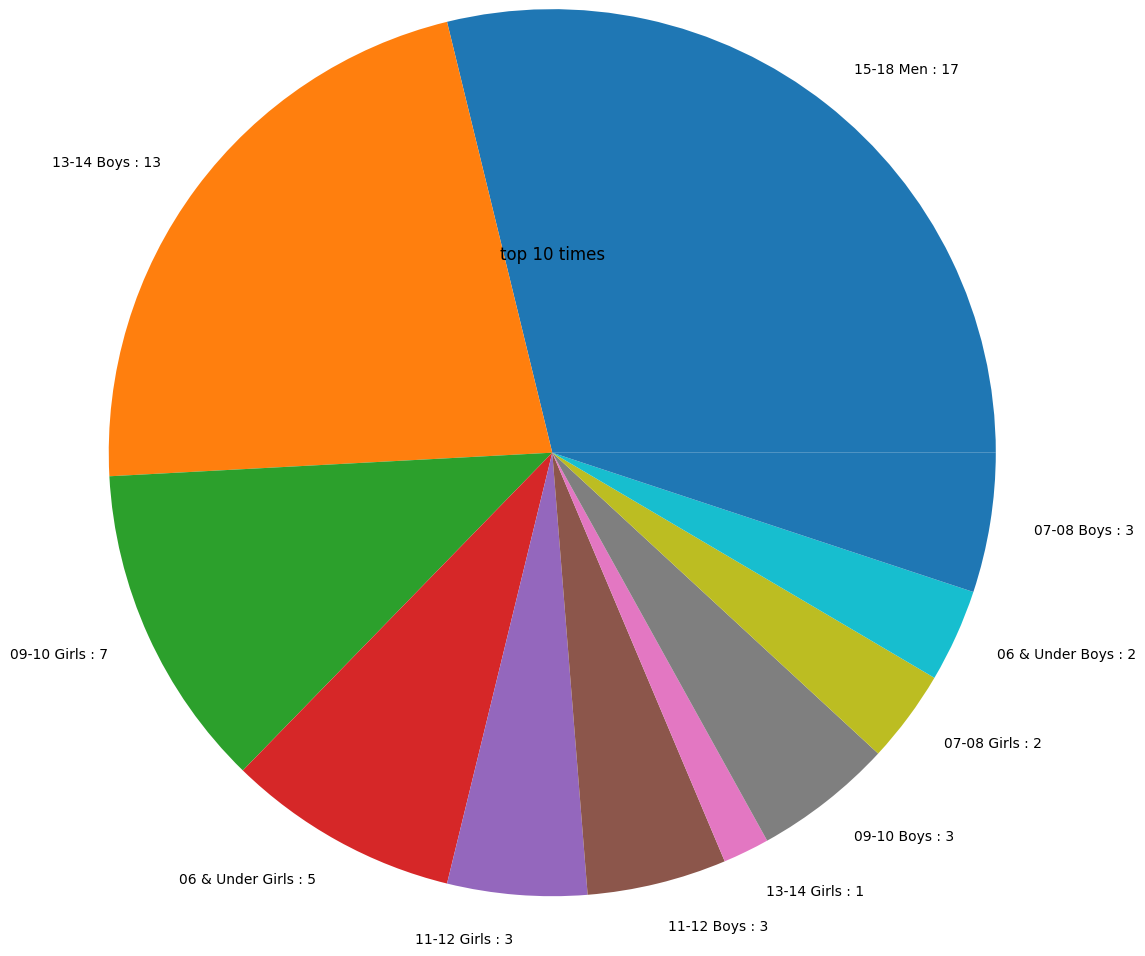

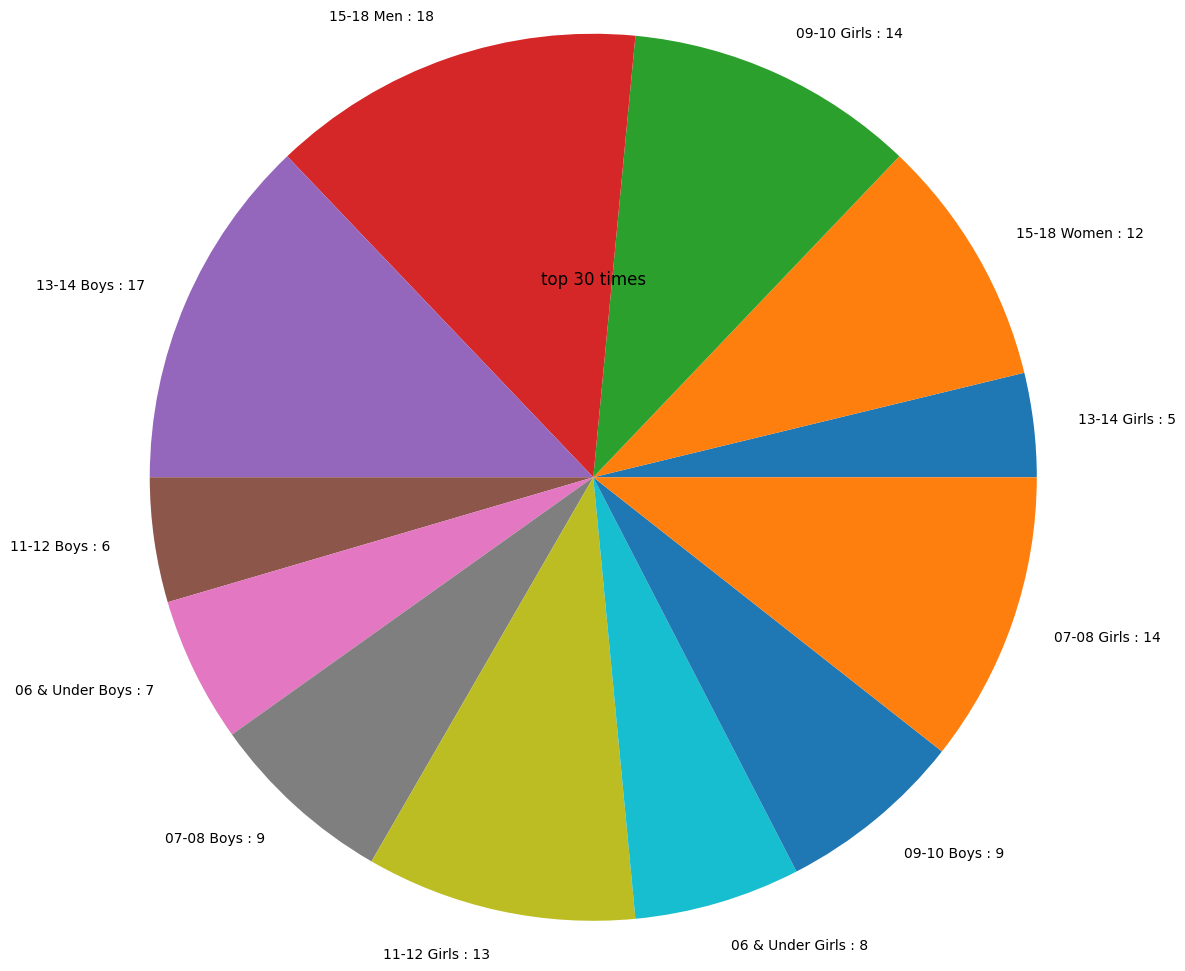

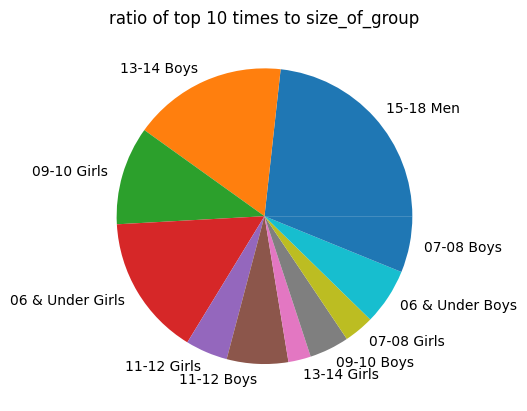

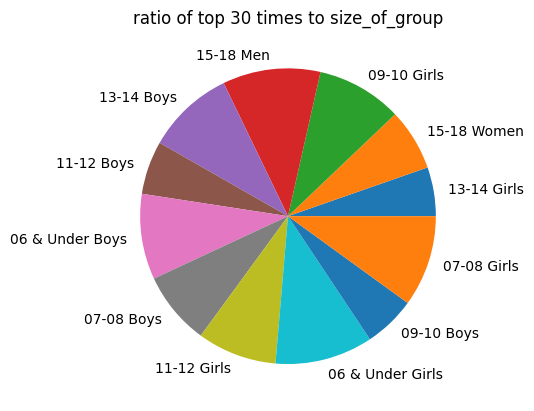

In [ ]:
plt.pie([len(x) for x in top_10_each_group.values()],labels = [x+' : '+str(len(top_10_each_group[x])) for x in top_10_each_group.keys()],radius=3)
plt.title('top 10 times')
plt.show()
print()
plt.pie([len(x) for x in top_30_each_group.values() ],labels = [x+' : '+str(len(top_30_each_group[x])) for x in top_30_each_group.keys()], radius = 3)
plt.title('top 30 times')
plt.show()
plt.pie([len(top_10_each_group[list(top_10_each_group.keys())[i]])/groups[list(top_10_each_group.keys())[i]] for i in range(0, len(top_10_each_group.keys()))],labels = [x for x in top_10_each_group.keys()])
plt.title('ratio of top 10 times to size_of_group')
plt.show()
plt.pie([len(top_30_each_group[list(top_30_each_group.keys())[i]])/groups[list(top_30_each_group.keys())[i]] for i in range(0, len(top_30_each_group.keys())) ],labels = [x for x in top_30_each_group.keys()])
plt.title('ratio of top 30 times to size_of_group')
plt.show()

In [ ]:
list(age_groups.keys())

['06 & Under Girls',
 '06 & Under Boys',
 '07-08 Girls',
 '07-08 Boys',
 '09-10 Boys',
 '09-10 Girls',
 '11-12 Boys',
 '11-12 Girls',
 '13-14 Boys',
 '13-14 Girls',
 '15-18 Men',
 '15-18 Women']

In [ ]:
people_not_coming = ['Yu, Ryan']

In [ ]:
people_going_to_champs = list(set(top_10_once[:] + top_30_three_times[:]))
print('people suggested: ' + str(len(people_going_to_champs)))

peoples_events_to_assign = {}
for group in age_groups.keys():
  peoples_events_to_assign[group] = {}
one_event = 0
two_event = 0
three_event = 0
for person in people_going_to_champs:
  slots = ['','','']
  if person+' Freestyle' in super_point_earners:
    slots[0] = 'Freestyle'
  if person+' Backstroke' in super_point_earners:
    slots[slots.index('')] = 'Backstroke'
  if person+' Breaststroke' in super_point_earners:
    slots[slots.index('')] = 'Breaststroke'
  if person+' Butterfly' in super_point_earners:
    if '' in slots:
      slots[slots.index('')] = 'Butterfly'
  if person+' IM' in super_point_earners:
    if '' in slots:
      slots[slots.index('')] = 'IM'
  if person+' Freestyle' in point_earners:
    if '' in slots and 'Freestyle' not in slots:
      slots[slots.index('')] = 'Freestyle'
  if person+' Backstroke' in point_earners:
    if '' in slots and 'Backstroke' not in slots:
      slots[slots.index('')] = 'Backstroke'
  if person+' Breaststroke' in point_earners:
    if '' in slots and 'Breaststroke' not in slots:
      slots[slots.index('')] = 'Breaststroke'
  if person+' Butterfly' in point_earners:
    if '' in slots and 'Butterfly' not in slots:
      slots[slots.index('')] = 'Butterfly'
  if person+' IM' in point_earners:
    if '' in slots and 'IM' not in slots:
      slots[slots.index('')] = 'IM'
  if slots.count('') == 0:
    three_event+=1
  elif slots.count('') == 1:
    two_event+=1
  else:
    one_event+=1
  peoples_events_to_assign[new_data[person]['AgeGroup']][person] = slots
print('people that are swimming one event(excluding relays): ',one_event,'people that are swimming two events(excluding relays): ',two_event,'people that are swimming three events(excluding relays): ',three_event)

for i in range(0,len(peoples_events_to_assign.keys())):
  the_current_group = list(peoples_events_to_assign.keys())[i]
  print()
  print(the_current_group)
  print()
  for person in peoples_events_to_assign[the_current_group].keys():
    if person not in people_not_coming:
      print(person,' '*(30-len(person)),''.join([x + (20-len(x))*' ' for x in peoples_events_to_assign[the_current_group][person]]))



people suggested: 91
people that are swimming one event(excluding relays):  4 people that are swimming two events(excluding relays):  5 people that are swimming three events(excluding relays):  82

06 & Under Girls

Feng, Elaine                    Freestyle                                                   
Huynh, Kayla                    Freestyle                                                   
Huang, Abigail                  Freestyle                                                   
Colitz, Ada                     Freestyle           Backstroke                              
Jin, Charlene                   Freestyle           Backstroke                              

06 & Under Boys

Li, Lucas                       Freestyle           Backstroke                              
Yip, Max                        Freestyle           Backstroke                              

07-08 Girls

Huang, Avery                    Backstroke          Breaststroke        Butterfly           
Li, Abbi

In [ ]:
list(age_groups.keys())

['06 & Under Girls',
 '06 & Under Boys',
 '07-08 Girls',
 '07-08 Boys',
 '09-10 Boys',
 '09-10 Girls',
 '11-12 Boys',
 '11-12 Girls',
 '13-14 Boys',
 '13-14 Girls',
 '15-18 Men',
 '15-18 Women']

In [ ]:
MEETS_AWAY_FROM_CHAMPS = 3

In [ ]:
people_to_consider = '''Caroline Shi
Kendra Bucci
Isabella Evans
Izzy Smith
Zoe Wu
Olivia Evans
Sophia Liu
Regina Tello
Maria Yu
Emma Gambhir
Jacky Lopez
Jessica Lopez
Joseph Frawley
Otto Lo
Zach Zhang
Zachary Zhang
Aiden Canen
Jarrett Coleman
Joe McGrath
Benjamin Tran'''.split('\n')
for person in people_to_consider:
  print(person)
  person_format_2 = person.split(' ')[1]+', '+person.split(' ')[0]
  persons_data = df_all_data[list(age_groups.keys()).index(new_data[person_format_2]['AgeGroup'])]
  stroke_format_2 = {'Freestyle':'Free','Backstroke':'Back','Breaststroke':'Breast','Butterfly':'Fly','IM':'IM'}
  for stroke in ['Freestyle','Backstroke','Breaststroke','Butterfly','IM']:
    persons_stuff = new_data[person_format_2]['Strokes']
    if stroke_format_2[stroke] in persons_stuff.keys():
      li = [float(x) if not x == '' else '' for x in persons_stuff[stroke_format_2[stroke]]]
      while '' in li:
        li.remove('')
      average_slope = 0
      for i in range(1,len(li)):
        average_slope+= li[i]-li[i-1]
      average_slope /= len(li)
      if len(li) >= 2:
        #print(new_data[person_format_2]['AgeGroup'])
        #print(persons_data)
        print(stroke,'current: ',float(persons_data[stroke][list(persons_data['Name']).index(person_format_2)]),' \tpredicted: ',float(persons_data[stroke][list(persons_data['Name']).index(person_format_2)])-(average_slope*MEETS_AWAY_FROM_CHAMPS))

Caroline Shi
Freestyle current:  28.15  	predicted:  27.857499999999998
Backstroke current:  29.37  	predicted:  29.385
Breaststroke current:  34.77  	predicted:  32.580000000000005
Butterfly current:  37.02  	predicted:  35.86500000000001
Kendra Bucci
Freestyle current:  19.41  	predicted:  19.064999999999998
Backstroke current:  26.22  	predicted:  26.925000000000004
Breaststroke current:  24.83  	predicted:  23.832499999999996
Butterfly current:  23.77  	predicted:  24.537999999999997
Isabella Evans
Freestyle current:  17.48  	predicted:  18.725
Backstroke current:  25.19  	predicted:  24.455000000000002
Breaststroke current:  27.91  	predicted:  27.17
Butterfly current:  26.69  	predicted:  22.370000000000005
Izzy Smith
Freestyle current:  17.52  	predicted:  17.573999999999998
Backstroke current:  23.05  	predicted:  22.3
Butterfly current:  21.69  	predicted:  20.724
Zoe Wu
Freestyle current:  18.8  	predicted:  18.43
Backstroke current:  22.14  	predicted:  22.9575
Breaststroke 

In [ ]:
new_data

{'Ambekar, Gargi': {'AgeGroup': '13-14 Girls',
  'AmountImprovedSec': '1.66',
  'Strokes': {'Free': ['35.82', '37.39', '35.97', '', '34.16', '', '', ''],
   'Back': ['42.58', '', '44.32', '43.93', '', '', '', ''],
   'Breast': ['50.35', '', '', '50.67', '', '', '', ''],
   'Fly': ['42.64', '43.96', '', '', '39.81', '', '', ''],
   'IM': ['95.33', '98.66', '', '93.27', '91.12', '', '', '']}},
 'Auby, Kate': {'AgeGroup': '11-12 Girls',
  'Strokes': {'Free': ['', '39.95', '42.52', '', '40.02', '', '', ''],
   'Back': ['', '50.53', '', '', '47.71', '', '', ''],
   'Breast': ['', '', '59.94', '', '', '', '', ''],
   'Fly': ['', '48.55', '', '', '49.3', '', '', ''],
   'IM': ['', '', '108.08', '', '', '', '', '']}},
 'Bandyopadhyay, Shristi': {'AgeGroup': '15-18 Women',
  'Strokes': {'Free': ['26.75', '26.67', '', '', '', '', '', ''],
   'Back': ['30.19', '30.07', '', '31.35', '', '', '', ''],
   'Breast': ['36.64', '', '39.18', '', '', '', '', ''],
   'Fly': ['27.75', '28.14', '29.39', '28.

In [ ]:
# https://stackoverflow.com/questions/18528533/pretty-printing-a-pandas-dataframe

In [ ]:
import csv
with open('improvments.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)

    for person in new_data.keys():
      points = 0
      for stroke in new_data[person]['Strokes']:
        stroke_counts = new_data[person]['Strokes'][stroke][:]
        while '' in stroke_counts:
          stroke_counts.remove('')
        fastest_time = float('inf')
        improvments = 0
        for i in range(0,len(stroke_counts)):
          if fastest_time > float(stroke_counts[i]):
            fastest_time = float(stroke_counts[i])
            improvments +=1
        if improvments > 2:
          points+=1
      print(person,':',' '*(25-len(person)),points)
      writer.writerow([person,points])



Ambekar, Gargi :             1
Auby, Kate :                 0
Bandyopadhyay, Shristi :     0
Bhavsar, Nishka :            0
Bucci, Kendra :              1
Cai, Evan :                  3
Caminez, Jonathan :          0
Canen, Aiden :               0
Cao, Ethan :                 0
Cao, Evan :                  1
Chembu, Achyuth :            1
Chen, Celina :               3
Chen, Deborah :              0
Chen, Isaac :                1
Chen, Jonathan :             1
Cheung, Elliot :             2
Cheung, Olive :              1
Chinn, Emily :               2
Chong, Sandra :              1
Chong, Sarah :               0
Choy, Ethan :                1
Coleman, Jarrett :           1
Colitz, Ada :                0
Colitz, Ezra :               0
Daley, Zack :                0
D'Amelio, Jimmy :            0
D’Amelio, Jimmy :            0
Diala, Jewls :               1
Dimick, Kaida :              2
Esguerra, Mikayla :          0
Evans, Isabella :            1
Evans, Olivia :              1
Feng, El

In [ ]:
new_data['D’Amelio, Jimmy']

{'AgeGroup': '13-14 Boys',
 'Strokes': {'Free': ['', '', '27.86', '', '27.8', '', '', ''],
  'Back': ['', '30.91', '33.06', '', '32.02', '', '', ''],
  'Breast': ['', '35.35', '', '', '35.54', '', '', ''],
  'Fly': ['', '', '30.95', '', '', '', '', ''],
  'IM': ['', '70.17', '', '', '', '', '', '']}}